##This notebook is used to merge the two paired-end reads from the Illumina sequencing data

In [11]:
# bringing in some python code
# screed reads the fasta or fastq files
import screed
# matplotlib.pyplot is a program for plotting data
import matplotlib.pyplot as plt
from mpltools import style
import numpy as np
from mpld3 import enable_notebook
# A mode is indicated by a % sign.
# Here we are telling it to show the graphics In the notebook itself
%matplotlib inline

/opt/virt_env/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [4]:
print "hello"

hello


In [12]:
# python code that allows us to have interactive figures in the notebook
enable_notebook()

In [3]:
# pigz unzips the files (could use something else to unzip them)
!pigz -k -d -p 2 ../../SeqData/Undetermined_S0_L001_R1_001.fastq.gz
# -k means keep the original, -d means decompress the input, -p means use this number of processors/cores

In [4]:
# pigz unzips the files (could use something else to unzip them)
!pigz -k -d -p 4 ../../SeqData/Undetermined_S0_L001_R2_001.fastq.gz

In [9]:
!wc -l ../../SeqData/Undetermined_S0_L001_R2_001.fastq

 66329956 ../../SeqData/Undetermined_S0_L001_R2_001.fastq


In [8]:
!wc -l ../../SeqData/Undetermined_S0_L001_R1_001.fastq

 66329956 ../../SeqData/Undetermined_S0_L001_R1_001.fastq


In [7]:
!head ../../SeqData/Undetermined_S0_L001_R1_001.fastq
# Check out the files

@M01056:154:000000000-AFBDE:1:1101:16240:1341 1:N:0:0
TGTCAGTGAATCATCGAATCTTTGCATATCAATAAGCGGAGGATCAGATCGGAAGAGCACACGTCTGAACTCCAGTCACCAAGCATGATCTCGTATGCCGTCTTCTGCTTGAAAAAAAATATTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
+
11>>>3DB1@DFBGG111FEGGHFFBGBGE33D311B0000//BA011DB/////00A1B0B/FFG/12BFD@11GFBE@1/0/0B11F1GD0F/B02@/E>FC2F11BG101110///0122221//<//-----:----------99-----99-9-9-------------999-9----9--9----9-9------9-----//////------9--------------9-------9--9-------
@M01056:154:000000000-AFBDE:1:1101:15349:1350 1:N:0:0
CACTCAGTGAGTCATCGAGTCTTTGAACGCACATTGCGCCCCCTGGCACTCCGGGGGGCATGCCTGTCCGAGCGTCATTGCTGCCCTTCAAGCCCGGCTTGTGTGTTGGGTCGTCGTCCCCCCCGGGGGACGGGCCCGAAAGGCAGCGGCGGCACCGCGTCCTTTCCTCGCGCGTTTGGGGCATCGTCTCCCTCTCGTTCTTTGCCCTCCGGGCGCCCTCCGTCCTCTCCTACCTTTTTCTTCTGCTTTTC
+
11>>A11D311DE1GE111GGGHH331EAA0A0FG1A0AAAAAE//A0BFBA////////>0<<F1F<<..-<-<<AGG0=C00::CFC0000.:---A@-;0;.;B..-;:-;A-;999A999------9-

In [2]:
# PEAR is an Illumina Paired-End reAd mergeR (Zhang et al., 2014)
!pear -h

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\
PEAR v0.9.6 [January 15, 2015]  - [+bzlib +zlib]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

License: Creative Commons Licence
Bug-reports and requests to: Tomas.Flouri@h-its.org and Jiajie.Zhang@h-its.org


Usage: pear <options>
Standard (mandatory):
  -f, --forward-fastq         <str>     Forward paired-end FASTQ file.
  -r, --reverse-fastq         <str>     Reverse paired-end FASTQ file.
  -o, --output                <str>     Output filename.
Optional:
  -p, --p-value               <float>   Specify  a p-value for the statistical test. If the computed
                                        p-value of a possible assembly exceeds the specified p-value
                                        then  paired-end  read  will not be assembled. V

In [10]:

!pear -m 600 -j 4 -f ../../SeqData/Undetermined_S0_L001_R1_001.fastq -r ../../SeqData/Undetermined_S0_L001_R2_001.fastq -o ../../SeqData/pear_merged-$(date +%F)
# -m is the maximum length we will consider assembling
# Thus, the data will be paired together, merged, including max lengths (-m 600) and using 4 processors (-j),
# returning a file called pear_merged-DATE

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\

PEAR v0.9.6 [January 15, 2015]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

Forward reads file.................: ../../SeqData/Undetermined_S0_L001_R1_001.fastq
Reverse reads file.................: ../../SeqData/Undetermined_S0_L001_R2_001.fastq
PHRED..............................: 33
Using empirical frequencies........: YES
Statistical method.................: OES
Maximum assembly length............: 600
Minimum assembly length............: 50
p-value............................: 0.010000
Quality score threshold (trimming).: 0
Minimum read size after trimming...: 1
Maximal ratio of uncalled bases....: 1.000000
Minimum overlap....................: 10
Scoring method.....................: Scaled score
Threads............................: 4

Al

In [1]:
# Screed is a module from C. Titus Brown
# Basically it takes your fasta file and makes a database that you can query
# Here, we're using it to loop through files, collect seq lengths, and plot as a histogram
# This will allow us to evaluate how well the pairing worked.
# You can find documentation here: http://screed.readthedocs.org/en/latest/
import screed

In [2]:
# This creates the database which it will query
# The database will have the sequence name, description, quality, and sequence itself (if those data are in the original files)
# The output will be NAME_screed
screed.read_fastq_sequences("../../SeqData/pear_merged-2015-07-13.assembled.fastq")

<ScreedDB, '../../SeqData/pear_merged-2015-07-13.assembled.fastq_screed'>

In [3]:
# We will load the fastq database we just made, calling it fqdb
db = screed.ScreedDB("../../SeqData/pear_merged-2015-07-13.assembled.fastq_screed")

In [4]:
# This will store, from our fqdb, the first record... to test the db (recall Python is 0-based, so 0 is the 1st item)
record = db[db.keys()[0]]

In [5]:
irdb=screed.ScreedDB("../../SeqData/Undetermined_S0_L001_I1_001.fastq_screed")
# We made this database over at demultiplex using screed.read_fastq_sequences

In [6]:
irdb[record["name"]]["sequence"]

'TTTTTTTTTTTT'

In [7]:
# This will now retrieve the sequence from our database for what we have set as the record
record["quality"]
# record["name"]

'11>AA??IBI@IFIFIII@IEIHII@IIIIHIEIH?I?AIEIIIIIIII=H>II>AIIIIII@GII?I>IIIIIBIIIIIIGIIGIIIFHIII@II?IIIIGIIBIBIIIIIIIIIIIIIIIHIIIIIIIIIIIIIIIHIII@IIII?IIII@@IIIIII>GGGHHHIA<?<I;III>I<III>?IICII@IIIIIIGAICIGIIII<IIAI9IIIIGCI999>>@>II9CIIAB3III;9II9III1==>>1>1'

In [9]:
# Here we are basically getting the length of each sequence
# First we create a string that is called "lengths"
# For each read from our database (we are looking at all the iterative values of our db), we find the length of the sequence
# from the sequence category of our database that we created. Then, we append this length to our original length file.
# We should end up with a file that has all the lengths of all our sequences, in a row. They are not necessarily tied to our 
# original sequence file
lengths = []
for record in db.itervalues():
    lengths.append((len(record["sequence"])))

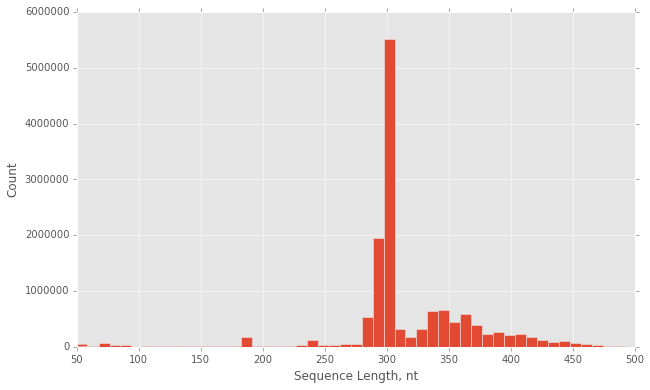

In [13]:
# Setting up graphics in ggplot
style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(111)
# There will be a histogram axis, where we graph the lengths in bins of 50
h = ax.hist(np.array(lengths), bins=50)
# The x axis will thus be the sequence length, in nucleotides
xl = ax.set_xlabel("Sequence Length, nt")
# While the y axis will be the count, or number of times this length bin showed up in our peared sequences
yl = ax.set_ylabel("Count")
# More figure sizing stuff
fig.set_size_inches((10,6))

In [14]:
# I want to know what the average sequence length is.
# We used 515F and 806R, so it should be around 300bp
import numpy
numpy.mean(lengths)

315.72010003465533

In [15]:
numpy.median(lengths)

299.0